# Tugas 3 Graph Berita Online

## Crawling Berita Online
- Mengimpor library requests untuk mengunduh halaman web, BeautifulSoup untuk parsing HTML, dan nltk untuk melakukan tokenisasi kalimat.
- library requests untuk mengunduh halaman web berita dari URL yang diberikan.
- BeautifulSoup untuk mengurai HTML halaman web sehingga mudah diakses dan diekstrak.
- nltk untuk melakukan tokenisasi kalimat. Pada tahap ini, teks berita dipecah menjadi kalimat-kalimat terpisah.

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

# Unduh konten halaman web berita
url = "https://www.antaranews.com/berita/3582189/tekuk-inter-pada-final-liga-champions-city-sukses-raih-treble-winners?utm_source=antaranews&utm_medium=desktop&utm_campaign=related_news"
response = requests.get(url)
html = response.text

# Parsing halaman web menggunakan BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

# Ekstraksi teks dari elemen-elemen yang berisi berita
article = soup.find('div' ,class_="post-content clearfix")  # Sesuaikan dengan struktur HTML halaman web berita
article_text = article.get_text()

# Tokenisasi teks menjadi kalimat menggunakan nltk
nltk.download('punkt')  # Pastikan Anda sudah mengunduh tokenisasi kalimat nltk
sentences = nltk.sent_tokenize(article_text)

# Cetak kalimat-kalimat
for sentence in sentences:
    print(sentence)



				Jakarta (ANTARA) - Manchester City sukses meraih treble winners usai menekuk Inter Milan dengan skor 1-0 pada final Liga Champions di Stadion Ataturk Olympic, Istanbul, Turki, Minggu dini hari WIB.
Kemenangan Manchester City atas Inter Milan hadir berkat gol yang dicetak Rodri pada babak kedua, demikian catatan Liga Champions.
Ini merupakan gelar Liga Champions pertama Manchester City setelah pada dua tahun sebelumnya gagal menjadi juara usai dikalahkan Chelsea pada partai final.
Pada pertandingan ini Manchester City tercatat mendominasi jalannya pertandingan dengan mencatatkan 56 persen penguasaan bola, namun Inter lebih unggul dalam memberikan ancaman dengan melepaskan 14 tendangan yang enam di antaranya tepat sasaran.
Baca juga: Man City dan Inter turunkan kekuatan terbaik pada final Liga Champions

Manchester City mengambil inisiatif menyerang terlebih dahulu dan sempat memberikan ancaman melalui tendangan Haaland yang masih dapat dihalau Andre Onana.
Selanjutnya giliran Kevin

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## TF-IDF
- Objek countvectorizer dan tfidfvectorizer dibuat menggunakan kelas CountVectorizer dan TfidfVectorizer masing-masing.
- Parameter analyzer='word' mengindikasikan bahwa analisis dilakukan pada tingkat kata.
- Parameter stop_words='english' menyertakan penghapusan kata-kata umum bahasa Inggris.
- Nama fitur (kata-kata) yang dihasilkan oleh vectorizer disimpan dalam variabel count_tokens dan tfidf_tokens.
- Teks yang disimpan dalam variabel gabung diubah menjadi matriks fitur menggunakan metode fit_transform dari objek vectorizer.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi penghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Hitung TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

# Daftar kata kunci
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konversi matriks TF-IDF menjadi bentuk yang lebih mudah dibaca
tfidf_values = tfidf_matrix.toarray()

# Cetak TF-IDF untuk setiap kata dalam setiap kalimat
for i, sentence in enumerate(sentences):
    print(f"Kalimat {i + 1}: {sentence}")
    for j, word in enumerate(feature_names):
        tfidf_value = tfidf_values[i][j]
        if tfidf_value > 0:
            print(f"{word}: {tfidf_value:.4f}")
    print()

Kalimat 1: 
				Jakarta (ANTARA) - Manchester City sukses meraih treble winners usai menekuk Inter Milan dengan skor 1-0 pada final Liga Champions di Stadion Ataturk Olympic, Istanbul, Turki, Minggu dini hari WIB.
antara: 0.1838
ataturk: 0.2140
champions: 0.1457
city: 0.1107
dengan: 0.1838
di: 0.1838
dini: 0.2140
final: 0.1623
hari: 0.2140
inter: 0.1107
istanbul: 0.2140
jakarta: 0.2140
liga: 0.1457
manchester: 0.1107
menekuk: 0.2140
meraih: 0.2140
milan: 0.1838
minggu: 0.2140
olympic: 0.2140
pada: 0.1107
skor: 0.1623
stadion: 0.2140
sukses: 0.2140
treble: 0.2140
turki: 0.2140
usai: 0.1838
wib: 0.2140
winners: 0.2140

Kalimat 2: Kemenangan Manchester City atas Inter Milan hadir berkat gol yang dicetak Rodri pada babak kedua, demikian catatan Liga Champions.
atas: 0.2844
babak: 0.2157
berkat: 0.2442
catatan: 0.2844
champions: 0.1936
city: 0.1471
demikian: 0.2844
dicetak: 0.2844
gol: 0.2442
hadir: 0.2844
inter: 0.1471
kedua: 0.2157
kemenangan: 0.2844
liga: 0.1936
manchester: 0.1471
milan:

## Cosinus Similarity
- Mengimpor dua kelas dari scikit-learn yang akan digunakan untuk menghitung cosine similarity dan menghasilkan vektor TF-IDF.
- Menentukan indeks dari dua kalimat yang akan dibandingkan. Indeks ini merujuk pada posisi kalimat dalam suatu data atau daftar kalimat yang diwakili oleh matriks TF-IDF.
- Mengambil vektor TF-IDF untuk masing-masing kalimat dari matriks TF-IDF. Matriks TF-IDF menyajikan representasi numerik dari kata-kata dalam dokumen berdasarkan frekuensi kata dan bobot invers dokumen.
- Menggunakan fungsi cosine_similarity dari scikit-learn untuk menghitung cosine similarity antara dua vektor TF-IDF. Hasilnya akan menjadi nilai similarity antara kedua kalimat.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Indeks kalimat yang akan dibandingkan
sentence1_index = 0  # Ganti dengan indeks kalimat pertama yang ingin Anda bandingkan
sentence2_index = 1  # Ganti dengan indeks kalimat kedua yang ingin Anda bandingkan

# Ambil vektor TF-IDF untuk kedua kalimat
tfidf_vector1 = tfidf_matrix[sentence1_index]
tfidf_vector2 = tfidf_matrix[sentence2_index]

# Hitung cosine similarity antara kedua vektor
similarity = cosine_similarity(tfidf_vector1, tfidf_vector2)

# Cetak hasil cosine similarity
print(f"Cosine Similarity antara Kalimat {sentence1_index + 1} dan Kalimat {sentence2_index + 1}: {similarity[0][0]:.4f}")


Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1664


In [ ]:
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Cetak hasil similarity_matrix
num_sentences = len(sentences)  # Jumlah kalimat
for i in range(num_sentences):
    for j in range(i+1, num_sentences):
        similarity = similarity_matrix[i][j]
        print(f"Cosine Similarity antara Kalimat {i + 1} dan Kalimat {j + 1}: {similarity:.4f}")

Cosine Similarity antara Kalimat 1 dan Kalimat 2: 0.1664
Cosine Similarity antara Kalimat 1 dan Kalimat 3: 0.1715
Cosine Similarity antara Kalimat 1 dan Kalimat 4: 0.1325
Cosine Similarity antara Kalimat 1 dan Kalimat 5: 0.1264
Cosine Similarity antara Kalimat 1 dan Kalimat 6: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 7: 0.0334
Cosine Similarity antara Kalimat 1 dan Kalimat 8: 0.0790
Cosine Similarity antara Kalimat 1 dan Kalimat 9: 0.0141
Cosine Similarity antara Kalimat 1 dan Kalimat 10: 0.0000
Cosine Similarity antara Kalimat 1 dan Kalimat 11: 0.0635
Cosine Similarity antara Kalimat 1 dan Kalimat 12: 0.0288
Cosine Similarity antara Kalimat 2 dan Kalimat 3: 0.1375
Cosine Similarity antara Kalimat 2 dan Kalimat 4: 0.0717
Cosine Similarity antara Kalimat 2 dan Kalimat 5: 0.1498
Cosine Similarity antara Kalimat 2 dan Kalimat 6: 0.0462
Cosine Similarity antara Kalimat 2 dan Kalimat 7: 0.1398
Cosine Similarity antara Kalimat 2 dan Kalimat 8: 0.1736
Cosine Similarity antara Kal

In [ ]:
import pandas as pd

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Cetak DataFrame
df

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12
Kalimat 1,1.000000,0.166446,0.171538,0.132486,0.126411,0.000000,0.033397,0.079046,0.014072,0.000000,0.063495,0.028803
Kalimat 2,0.166446,1.000000,0.137538,0.071744,0.149768,0.046190,0.139835,0.173597,0.088945,0.025271,0.154840,0.027770
Kalimat 3,0.171538,0.137538,1.000000,0.082544,0.143023,0.000000,0.037786,0.117310,0.000000,0.000000,0.066338,0.000000
Kalimat 4,0.132486,0.071744,0.082544,1.000000,0.107805,0.096098,0.090959,0.097114,0.094323,0.064515,0.032588,0.018416
Kalimat 5,0.126411,0.149768,0.143023,0.107805,1.000000,0.229911,0.146538,0.163102,0.184880,0.129491,0.064980,0.174715
Kalimat 6,0.000000,0.046190,0.000000,0.096098,0.229911,1.000000,0.142285,0.031013,0.194415,0.485793,0.024912,0.080402
Kalimat 7,0.033397,0.139835,0.037786,0.090959,0.146538,0.142285,1.000000,0.050710,0.079734,0.253928,0.353293,0.044965
Kalimat 8,0.079046,0.173597,0.117310,0.097114,0.163102,0.031013,0.050710,1.000000,0.000000,0.000000,0.106637,0.000000
Kalimat 9,0.014072,0.088945,0.000000,0.094323,0.184880,0.194415,0.079734,0.000000,1.000000,0.159771,0.073350,0.024001
Kalimat 10,0.000000,0.025271,0.000000,0.064515,0.129491,0.485793,0.253928,0.000000,0.159771,1.000000,0.127039,0.083644


## Graph
- mengimpor pustaka yang diperlukan, yaitu Pandas untuk bekerja dengan data tabular, NumPy untuk operasi numerik, dan Matplotlib untuk visualisasi.
- menghitung cosine similarity antara semua pasangan kalimat menggunakan matriks TF-IDF sebelumnya (tfidf_matrix). Cosine similarity digunakan untuk mengukur sejauh mana dua vektor (dalam hal ini, representasi TF-IDF dari kalimat) sejajar.
- membuat DataFrame Pandas dari matriks cosine similarity. DataFrame ini akan digunakan untuk membuat visualisasi matriks.
- fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax) membuat gambar matriks menggunakan Matplotlib, dengan warna yang merepresentasikan nilai cosine similarity antar kalimat.
- ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index) yaitu menambahkan label pada sumbu X dan Y, yang merepresentasikan kalimat-kalimat yang dibandingkan.
- for i in range(len(df.index)):
  for j in range(len(df.columns)):
  text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w') menambahkan teks yang merepresentasikan nilai cosine similarity di tengah-tengah sel matriks.

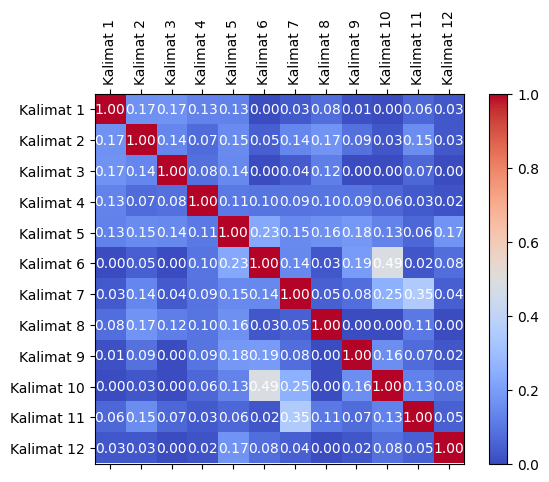

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Matriks TF-IDF telah dihitung sebelumnya (tfidf_matrix)
# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Nama kolom dan indeks untuk DataFrame
sentence_indices = [f"Kalimat {i + 1}" for i in range(len(sentences))]

# Buat DataFrame dari hasil cosine similarity
df = pd.DataFrame(similarity_matrix, columns=sentence_indices, index=sentence_indices)

# Membuat grafik matriks
fig, ax = plt.subplots()
cax = ax.matshow(df, cmap='coolwarm')
fig.colorbar(cax)

# Memberi label pada sumbu X dan Y
ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))
ax.set_xticklabels(df.columns, rotation=90)
ax.set_yticklabels(df.index)

# Menampilkan nilai similarity pada matriks
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        text = ax.text(j, i, f'{df.iat[i, j]:.2f}', ha='center', va='center', color='w')

plt.show()

## Closeness Centrality
- Import Library: Kode dimulai dengan mengimpor pustaka networkx dengan alias nx. Library ini digunakan untuk manipulasi dan analisis graf.
- Inisialisasi Graf: Sebuah objek graf (G) dibuat sebagai objek dari kelas Graph dari pustaka networkx.
- Tambahkan Simpul: Setiap kalimat dalam sentences ditambahkan sebagai simpul (node) ke dalam graf.
- Tambahkan Tepi Berdasarkan Similarity: Tepi (edge) antara kalimat ditambahkan ke graf berdasarkan nilai similarity antara kalimat-kalimat tersebut.
- Hitung Closeness Centrality: Closeness centrality dihitung untuk setiap simpul dalam grafik. Closeness centrality mengukur seberapa dekat suatu simpul dengan simpul-simpul lain dalam grafik.

In [ ]:
import networkx as nx

# Buat grafik dari matriks similarity
G = nx.Graph()

# Tambahkan simpul (node) ke grafik yang mewakili setiap kalimat
for sentence in sentences:
    G.add_node(sentence)

# Tambahkan tepi (edge) antara kalimat berdasarkan similarity
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity = df.iloc[i, j]  # Mengambil similarity dari DataFrame
        if similarity > 0:
            G.add_edge(sentences[i], sentences[j], weight=similarity)

# Hitung closeness centrality untuk setiap simpul
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Cetak closeness centrality
for sentence, centrality in closeness_centrality.items():
    print(f"Closeness Centrality of {sentence}: {centrality:.4f}")

Closeness Centrality of 
				Jakarta (ANTARA) - Manchester City sukses meraih treble winners usai menekuk Inter Milan dengan skor 1-0 pada final Liga Champions di Stadion Ataturk Olympic, Istanbul, Turki, Minggu dini hari WIB.: 15.9316
Closeness Centrality of Kemenangan Manchester City atas Inter Milan hadir berkat gol yang dicetak Rodri pada babak kedua, demikian catatan Liga Champions.: 15.2480
Closeness Centrality of Ini merupakan gelar Liga Champions pertama Manchester City setelah pada dua tahun sebelumnya gagal menjadi juara usai dikalahkan Chelsea pada partai final.: 11.1875
Closeness Centrality of Pada pertandingan ini Manchester City tercatat mendominasi jalannya pertandingan dengan mencatatkan 56 persen penguasaan bola, namun Inter lebih unggul dalam memberikan ancaman dengan melepaskan 14 tendangan yang enam di antaranya tepat sasaran.: 17.1647
Closeness Centrality of Baca juga: Man City dan Inter turunkan kekuatan terbaik pada final Liga Champions

Manchester City mengambil

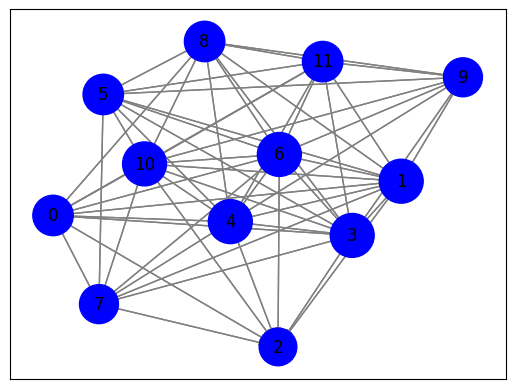

Closeness Centrality:
Node 0: 0.8462
Node 1: 1.0000
Node 2: 0.7333
Node 3: 1.0000
Node 4: 1.0000
Node 5: 0.8462
Node 6: 1.0000
Node 7: 0.7857
Node 8: 0.8462
Node 9: 0.7857
Node 10: 1.0000
Node 11: 0.8462


In [ ]:
import networkx as nx

# Hitung cosine similarity antara semua pasangan kalimat
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat grafik berarah (DiGraph) berdasarkan similarity_matrix
G = nx.DiGraph()
for i in range(len(similarity_matrix)):
    G.add_node(i)  # Tambahkan node dengan indeks numerik

for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > 0 and i != j:  # Pastikan node tidak menghubungkan dirinya sendiri
            G.add_edge(i, j)

# Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Visualisasi closeness centrality
pos = nx.spring_layout(G)  # Atur layout grafik
node_size = [v * 1000 for v in closeness_centrality.values()]  # Ubah ukuran node berdasarkan closeness centrality, dengan faktor pengurangan ukuran

nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

# Cetak closeness centrality
print("Closeness Centrality:")
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: {closeness:.4f}")

## Closeness Ranking
- networkx: Digunakan untuk menganalisis struktur, dinamika, dan fungsi jaringan kompleks.
- cosine_similarity: Digunakan untuk menghitung kemiripan kosinus antara vektor-vektor.
- TfidfVectorizer: Digunakan untuk mengubah teks menjadi representasi TF-IDF.
- normalize: Digunakan untuk meng-normalisasi vektor-vektor.
- top_nodes = sorted_nodes[:3]
Mengambil tiga node teratas berdasarkan closeness centrality.
- sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)
Mengurutkan node berdasarkan nilai closeness centrality secara menurun.
- Membuat data frame yang berisi informasi tentang node-node teratas, termasuk rank (node), nilai closeness centrality, dan kalimat yang terkait dengan setiap node.

In [ ]:
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

# Urutkan node berdasarkan closeness centrality
sorted_nodes = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)

# Ambil 3 node teratas
top_nodes = sorted_nodes[:3]

data = []
for node in top_nodes:
    sentence = sentences[node]
    centrality = closeness_centrality[node]
    data.append((f"{node}", centrality, sentence))

df = pd.DataFrame(data, columns=["Rank (Node)", "Closeness Centrality", "Sentence"])
df

,Rank (Node),Closeness Centrality,Sentence
0,1,1.0,Kemenangan Manchester City atas Inter Milan ha...
1,3,1.0,Pada pertandingan ini Manchester City tercatat...
2,4,1.0,Baca juga: Man City dan Inter turunkan kekuata...


## Pagerank Ranking
- G = nx.DiGraph(nx.path_graph(len(sentences))): Membuat graf yang berupa jalur (path graph) dengan jumlah simpul (nodes) sesuai dengan jumlah kalimat (sentences). DiGraph menunjukkan bahwa graf ini berarah.
- pr = nx.pagerank(G, alpha=0.9): Menggunakan algoritma PageRank dari NetworkX untuk menghitung nilai PageRank setiap simpul dalam graf. Nilai alpha yang diberikan adalah 0.9, yang merupakan parameter damping untuk mengontrol seberapa sering pengguna "berpindah" dari satu halaman ke halaman lainnya.
- sorted_nodes_pagerank = sorted(pr, key=pr.get, reverse=True): Mengurutkan simpul (nodes) berdasarkan nilai PageRank secara menurun (reverse=True). Ini menghasilkan daftar simpul yang memiliki PageRank tertinggi di awal.
- top_nodes_pagerank = sorted_nodes_pagerank[:3]: Mengambil tiga simpul teratas berdasarkan nilai PageRank tertinggi.

In [ ]:
G = nx.DiGraph(nx.path_graph(len(sentences)))
pr = nx.pagerank(G, alpha=0.9)

# Urutkan node berdasarkan PageRank
sorted_nodes_pagerank = sorted(pr, key=pr.get, reverse=True)

# Ambil 3 node teratas berdasarkan PageRank
top_nodes_pagerank = sorted_nodes_pagerank[:3]

data = []
for node in top_nodes_pagerank:
    sentence = sentences[node]
    pagerank = pr[node]
    data.append((node, pagerank, sentence))

# Buat DataFrame
df = pd.DataFrame(data, columns=['Node', 'Pagerank', 'Sentence'])
df

,Node,Pagerank,Sentence
0,1,0.095568,Kemenangan Manchester City atas Inter Milan ha...
1,10,0.095568,"Menjelang berakhirnya babak kedua, Inter memil..."
2,2,0.091175,Ini merupakan gelar Liga Champions pertama Man...


## Eigenvector Ranking
- Membuat graf (graph) menggunakan pustaka NetworkX dengan tipe graf jalur (path graph) berdasarkan jumlah kalimat yang diberikan (len(sentences)).
- centrality = nx.eigenvector_centrality(G_eigenvector)
Menghitung eigenvector centrality untuk setiap node dalam graf menggunakan metode eigenvector_centrality dari NetworkX.
- top_nodes_eigenvector = sorted_nodes_eigenvector[:3]
Memilih tiga node teratas berdasarkan nilai eigenvector centrality yang sudah diurutkan sebelumnya.
- sorted_nodes_eigenvector = sorted(centrality, key=centrality.get, reverse=True)
Mengurutkan node-node berdasarkan nilai eigenvector centrality secara menurun.

In [ ]:
G_eigenvector = nx.path_graph(len(sentences))
centrality = nx.eigenvector_centrality(G_eigenvector)

# Urutkan node berdasarkan Eigenvector Centrality
sorted_nodes_eigenvector = sorted(centrality, key=centrality.get, reverse=True)

# Ambil 3 node teratas berdasarkan Eigenvector Centrality
top_nodes_eigenvector = sorted_nodes_eigenvector[:3]

data = []

# Tampilkan kalimat dan nilai Eigenvector Centrality bersama-sama
for node in top_nodes_eigenvector:
    sentence = sentences[node]
    eigenvector = centrality[node]
    data.append({'Node': node, 'Eigenvector Centrality': eigenvector, 'Sentence': sentence})

df = pd.DataFrame(data)
df

,Node,Eigenvector Centrality,Sentence
0,5,0.389365,Selanjutnya giliran Kevin De Bruyne yang membe...
1,6,0.389365,Pada babak kedua Inter memiliki peluang emas m...
2,4,0.366740,Baca juga: Man City dan Inter turunkan kekuata...
